# **APARTMENT RENTAL PREDICTION IN GERMANY**

## **DATASET INFORMATION**

In [87]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt # dataviz
import seaborn as sns # dataviz
import plotly.express as px
import plotly.graph_objs as go

In [88]:
data = pd.read_csv('/content/immo_data.csv')

In [89]:
data.shape

(268850, 49)

In [90]:
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [91]:
data.tail()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
268845,Bayern,90.0,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.0,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.0,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.0,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.0,NO_INFORMATION,2019.0,NaN,NaN,May19
268849,Hessen,315.0,central_heating,NaN,NaN,False,True,9,5.00,NaN,...,Frankfurt_am_Main,Sossenheim,"Schöne, helle, gut geschnittene und teilmöblie...","Balkon, Keller, Fahrstuhl, Vollbad, Einbauküch...",NaN,NaN,NaN,NaN,NaN,Feb20


In [92]:
data.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [93]:
data.describe(include='object')

,regio1,heatingType,telekomTvOffer,firingTypes,geo_bln,houseNumber,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,typeOfFlat,regio2,regio3,description,facilities,energyEfficiencyClass,date
count,268850,223994,236231,211886,268850,197832,268850,200361,156185,154277,268850,197837,232236,268850,268850,249103,215926,77787,268850
unique,16,13,3,132,16,5510,419,10,4,3,52373,54490,10,419,8684,212621,189526,10,4
top,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,gas,Nordrhein_Westfalen,1,Leipzig,well_kept,normal,negotiable,no_information,Hauptstraße,apartment,Leipzig,Innenstadt,+ MEIN GUENTZ - Quartier der Generationen\r\n+...,Laminat,C,Feb20
freq,62863,128977,227632,110899,62863,7173,13723,66591,81826,91970,71013,911,131522,13723,4751,216,207,14613,79276


GETTING MAXIMUM VALUES FOR EACH FEATURE

In [94]:
data.max()

<ipython-input-94-8637789457d2>:1: FutureWarning:

The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



regio1                                                  Thüringen
serviceCharge                                            146118.0
telekomHybridUploadSpeed                                     10.0
newlyConst                                                   True
balcony                                                      True
picturecount                                                  121
pricetrend                                                  14.92
telekomUploadSpeed                                          100.0
totalRent                                              15751535.0
yearConstructed                                            2090.0
scoutId                                                 115711743
noParkSpaces                                               2241.0
hasKitchen                                                   True
geo_bln                                                 Thüringen
cellar                                                       True
yearConstr

LIST OF CATEGORICAL FEATURES IN DATASET

In [95]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)

Index(['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln',
       'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3',
       'description', 'facilities', 'energyEfficiencyClass', 'date'],
      dtype='object')


LIST OF NUMERICAL COLUMNS IN DATASET

In [96]:
numerical_cols=data.columns[data.dtypes !='object']
print(numerical_cols)

Index(['serviceCharge', 'telekomHybridUploadSpeed', 'newlyConst', 'balcony',
       'picturecount', 'pricetrend', 'telekomUploadSpeed', 'totalRent',
       'yearConstructed', 'scoutId', 'noParkSpaces', 'hasKitchen', 'cellar',
       'yearConstructedRange', 'baseRent', 'livingSpace', 'lift',
       'baseRentRange', 'geo_plz', 'noRooms', 'thermalChar', 'floor',
       'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'heatingCosts', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')


DATA TYPES OF ALL THE FEATURES

In [97]:
data.dtypes

regio1                       object
serviceCharge               float64
heatingType                  object
telekomTvOffer               object
telekomHybridUploadSpeed    float64
newlyConst                     bool
balcony                        bool
picturecount                  int64
pricetrend                  float64
telekomUploadSpeed          float64
totalRent                   float64
yearConstructed             float64
scoutId                       int64
noParkSpaces                float64
firingTypes                  object
hasKitchen                     bool
geo_bln                      object
cellar                         bool
yearConstructedRange        float64
baseRent                    float64
houseNumber                  object
livingSpace                 float64
geo_krs                      object
condition                    object
interiorQual                 object
petsAllowed                  object
street                       object
streetPlain                 

GETTING THE UNIQUE VALUES OF FEATURES

In [98]:
data.nunique()

regio1                          16
serviceCharge                12266
heatingType                     13
telekomTvOffer                   3
telekomHybridUploadSpeed         1
newlyConst                       2
balcony                          2
picturecount                    95
pricetrend                    1234
telekomUploadSpeed               7
totalRent                    28486
yearConstructed                465
scoutId                     268850
noParkSpaces                    71
firingTypes                    132
hasKitchen                       2
geo_bln                         16
cellar                           2
yearConstructedRange             9
baseRent                     26659
houseNumber                   5510
livingSpace                  13005
geo_krs                        419
condition                       10
interiorQual                     4
petsAllowed                      3
street                       52373
streetPlain                  54490
lift                

## **DATA CLEANING**

DROPPING THE UNNECESSARY COLUMNS

In [99]:
data=data.drop(['telekomHybridUploadSpeed','electricityKwhPrice','lastRefurbish','electricityBasePrice','energyEfficiencyClass','heatingCosts','noParkSpaces','petsAllowed','interiorQual','thermalChar','houseNumber','streetPlain','condition','firingTypes','facilities','heatingType','telekomTvOffer',
                'description','regio3','regio2','garden','geo_krs','cellar','geo_bln','scoutId','picturecount','date','telekomUploadSpeed'],axis=1)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   serviceCharge         261941 non-null  float64
 2   newlyConst            268850 non-null  bool   
 3   balcony               268850 non-null  bool   
 4   pricetrend            267018 non-null  float64
 5   totalRent             228333 non-null  float64
 6   yearConstructed       211805 non-null  float64
 7   hasKitchen            268850 non-null  bool   
 8   yearConstructedRange  211805 non-null  float64
 9   baseRent              268850 non-null  float64
 10  livingSpace           268850 non-null  float64
 11  street                268850 non-null  object 
 12  lift                  268850 non-null  bool   
 13  baseRentRange         268850 non-null  int64  
 14  typeOfFlat            232236 non-null  object 
 15  

CHECKING OF NULL VALUES

In [101]:
data.isnull().sum()

regio1                      0
serviceCharge            6909
newlyConst                  0
balcony                     0
pricetrend               1832
totalRent               40517
yearConstructed         57045
hasKitchen                  0
yearConstructedRange    57045
baseRent                    0
livingSpace                 0
street                      0
lift                        0
baseRentRange               0
typeOfFlat              36614
geo_plz                     0
noRooms                     0
floor                   51309
numberOfFloors          97732
noRoomsRange                0
livingSpaceRange            0
dtype: int64

REMOVAL OF NULL VALUES

In [102]:
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Replace missing values in categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])



# Verify if there are still missing values
missing_values = data.isnull().sum()
missing_values

regio1                  0
serviceCharge           0
newlyConst              0
balcony                 0
pricetrend              0
totalRent               0
yearConstructed         0
hasKitchen              0
yearConstructedRange    0
baseRent                0
livingSpace             0
street                  0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
floor                   0
numberOfFloors          0
noRoomsRange            0
livingSpaceRange        0
dtype: int64

CHECKING FOR DUPLICATE VALUES

In [103]:
data.duplicated().sum()


2704

DROPPING OUT THE DUPLICATE VALUES

In [104]:
data=data.drop_duplicates()

In [105]:
data.duplicated().sum()

0

GETTING THE UNIQUE VALUES OF THE FEATURES

In [106]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':\n{unique_values}\n")

Unique values in column 'regio1':
['Nordrhein_Westfalen' 'Rheinland_Pfalz' 'Sachsen' 'Bremen'
 'Schleswig_Holstein' 'Baden_Württemberg' 'Thüringen' 'Hessen'
 'Niedersachsen' 'Bayern' 'Hamburg' 'Sachsen_Anhalt'
 'Mecklenburg_Vorpommern' 'Berlin' 'Brandenburg' 'Saarland']

Unique values in column 'serviceCharge':
[245.   134.   255.   ... 189.65 250.94 112.13]

Unique values in column 'newlyConst':
[False  True]

Unique values in column 'balcony':
[False  True]

Unique values in column 'pricetrend':
[ 4.62  3.47  2.72 ... 10.3  -3.88 -0.45]

Unique values in column 'totalRent':
[ 840.          901.33152155 1300.         ...  436.55        828.77
 1479.64      ]

Unique values in column 'yearConstructed':
[1965.         1871.         2019.         1964.         1950.
 1999.         1966.40059017 1959.         1970.         1953.
 1930.         1892.         1912.         1951.         2018.
 1990.         1897.         1914.         2013.         1978.
 1890.         1902.         1977.  

Outlier Detection using Boxplot



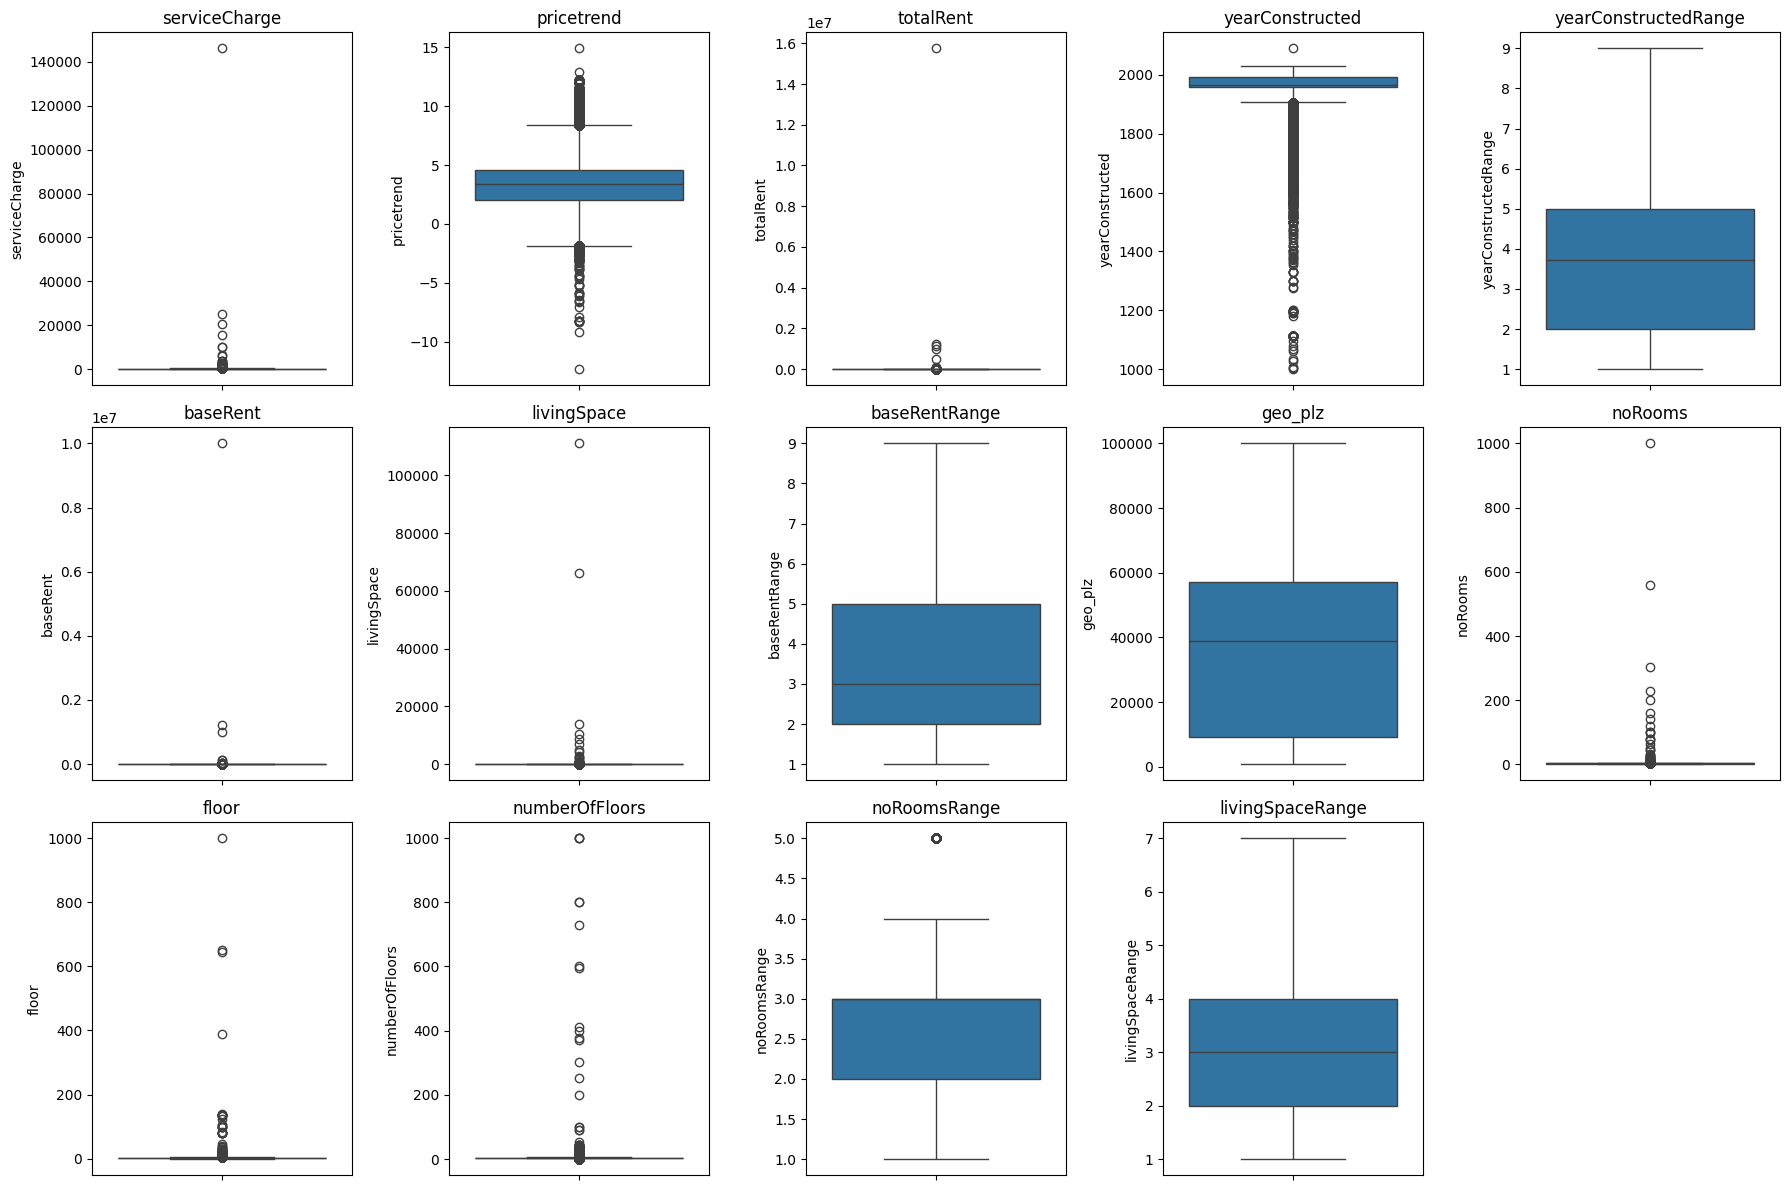

In [107]:
# DataFrame named 'data' with numerical columns
numerical_columns = data.select_dtypes(include='number')

plt.figure(figsize=(18, 12))

num_plots = len(numerical_columns.columns)  # Total number of plots
num_rows = (num_plots // 5) + 1  # Calculate the number of rows needed

for i, col in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 5, i+1)  # Adjusting subplot position
    sns.boxplot(y=numerical_columns[col], showfliers=True)
    plt.title(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [108]:
#z-score method to reduce outliers
def z_score_method(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    outliers = np.abs(z_scores) > threshold
    return outliers

In [109]:
df = z_score_method(data[['serviceCharge', 'pricetrend', 'totalRent', 'yearConstructed', 'baseRent', 'livingSpace', 'noRooms', 'floor', 'numberOfFloors', 'noRoomsRange']])


In [110]:
print("Outliers using Z-Score method:")
print(data[df.any(axis=1)])


Outliers using Z-Score method:
           regio1  serviceCharge  newlyConst  balcony  pricetrend  \
102        Hessen         120.00       False     True        3.64   
142        Berlin         221.11       False     True        6.06   
275        Bayern         180.00       False    False        3.77   
286        Berlin         215.00       False     True       10.23   
312     Thüringen         136.00       False    False        1.85   
...           ...            ...         ...      ...         ...   
268502     Hessen         240.00       False     True        5.33   
268589     Berlin         160.00       False    False       11.54   
268606     Hessen        1100.00        True     True        4.38   
268709     Berlin         150.00       False     True        9.70   
268762     Bayern          80.00       False    False        9.64   

          totalRent  yearConstructed  hasKitchen  yearConstructedRange  \
102      901.331522           1800.0        True                  

In [111]:
# outliers_z_score contains boolean values indicating outliers
df= data[~df.any(axis=1)]

# Summary statistics after outlier removal
summary_after_removal = df.describe()
print("\nSummary Statistics After Outlier Removal:")
print(summary_after_removal)



Summary Statistics After Outlier Removal:
       serviceCharge     pricetrend      totalRent  yearConstructed  \
count  261676.000000  261676.000000  261676.000000    261676.000000   
mean      149.600686       3.335237     821.730892      1967.789272   
std        82.278622       1.855757     534.387347        33.779061   
min         0.000000      -2.470000       0.000000      1842.000000   
25%        96.000000       2.000000     495.000000      1958.000000   
50%       140.000000       3.389001     740.000000      1966.400590   
75%       185.000000       4.540000     901.331522      1992.000000   
max      1057.500000       9.240000   64651.000000      2090.000000   

       yearConstructedRange       baseRent    livingSpace  baseRentRange  \
count         261676.000000  261676.000000  261676.000000  261676.000000   
mean               3.720922     641.633243      73.380754       3.744627   
std                2.418583     497.886076      31.622318       2.202523   
min          

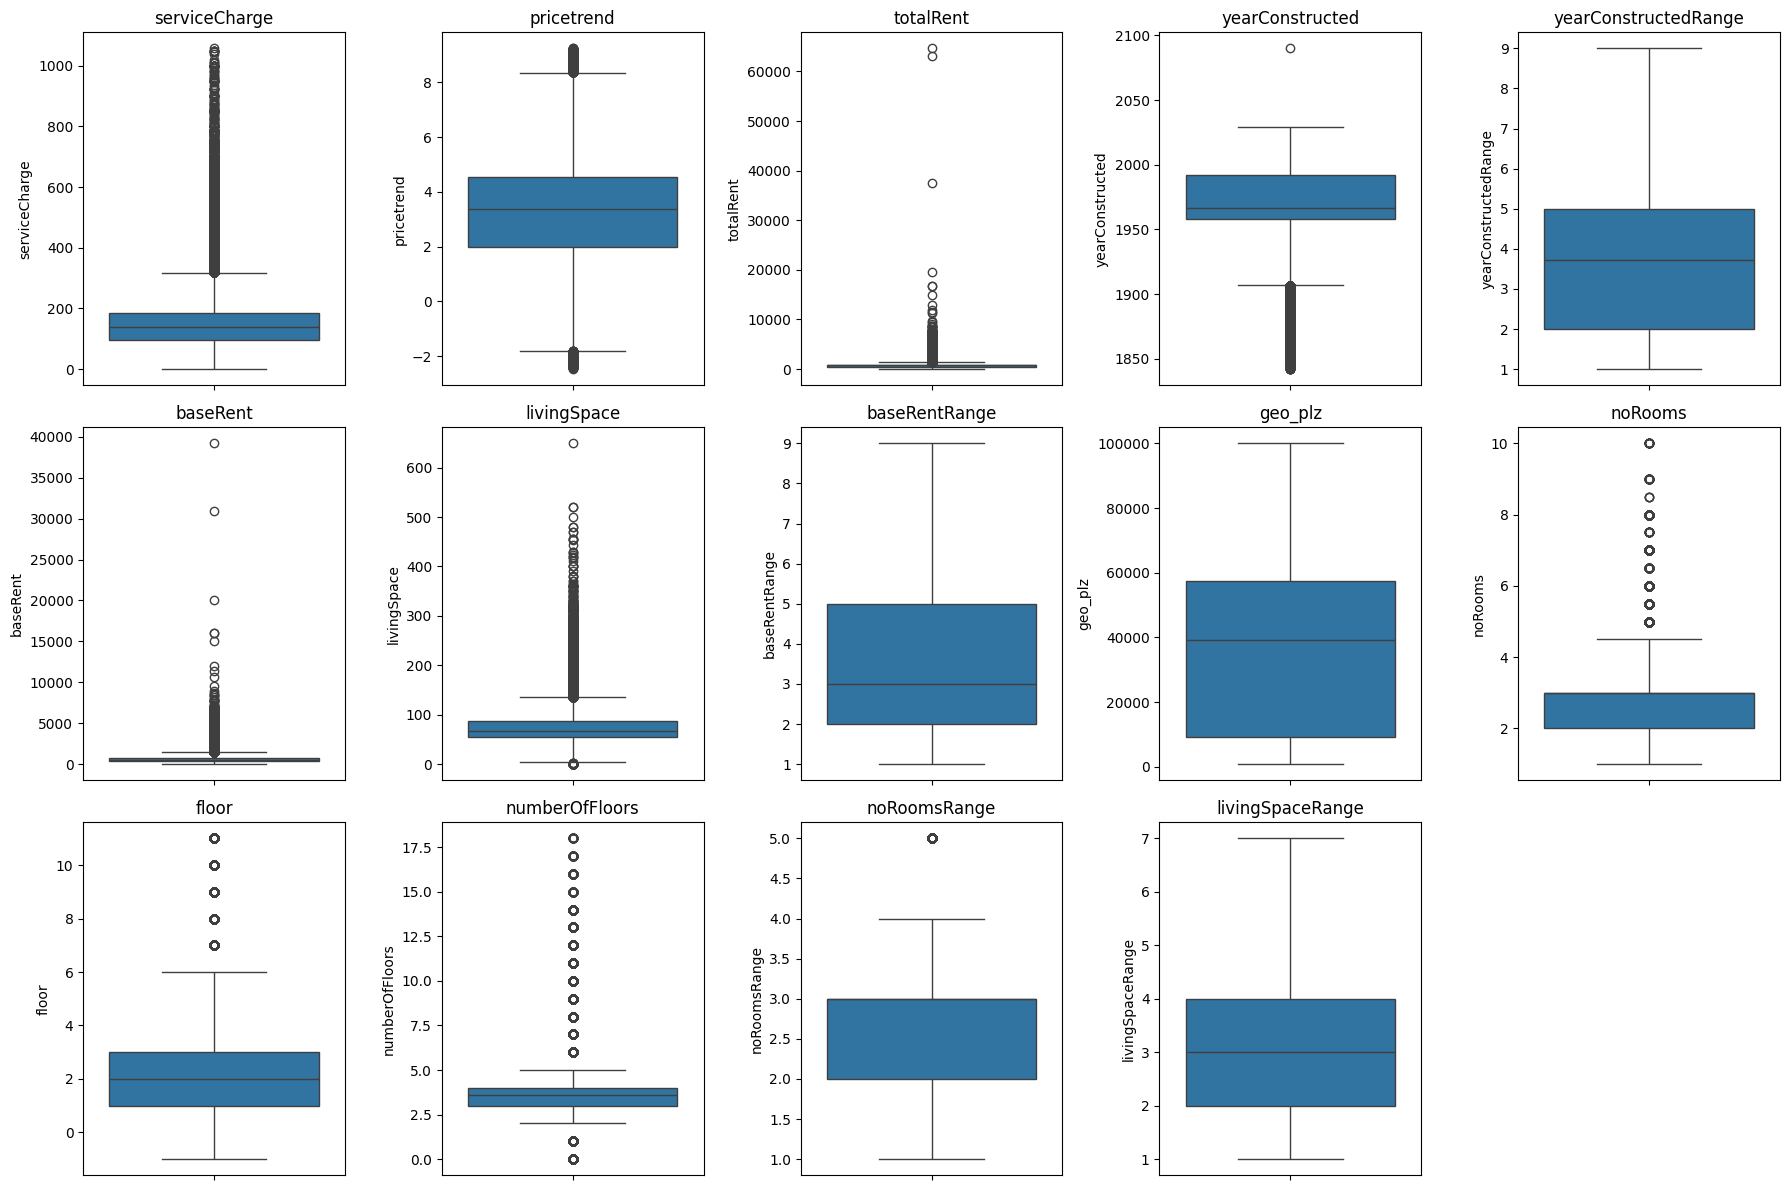

In [112]:
numerical_columns = df.select_dtypes(include='number')

plt.figure(figsize=(18, 12))

num_plots = len(numerical_columns.columns)  # Total number of plots
num_rows = (num_plots // 5) + 1  # Calculate the number of rows needed

for i, col in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 5, i+1)  # Adjusting subplot position
    sns.boxplot(y=numerical_columns[col], showfliers=True)
    plt.title(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [113]:
df.isnull().sum()

regio1                  0
serviceCharge           0
newlyConst              0
balcony                 0
pricetrend              0
totalRent               0
yearConstructed         0
hasKitchen              0
yearConstructedRange    0
baseRent                0
livingSpace             0
street                  0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
floor                   0
numberOfFloors          0
noRoomsRange            0
livingSpaceRange        0
dtype: int64

<ipython-input-116-348862f89368>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




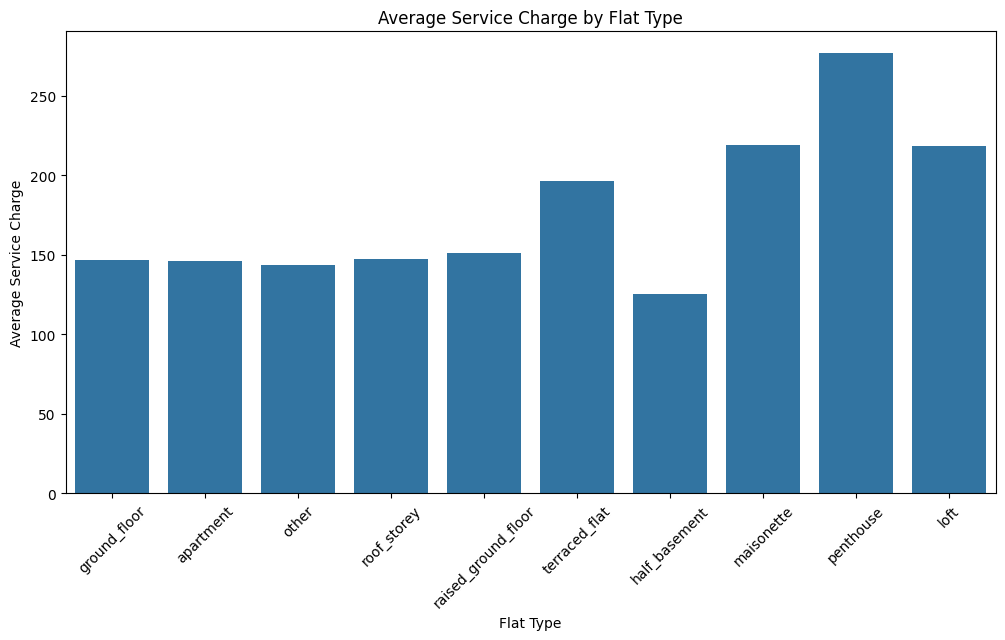

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='typeOfFlat', y='serviceCharge', ci=None)
plt.title('Average Service Charge by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Service Charge')
plt.xticks(rotation=45)
plt.show()


Text(0, 0.5, 'Count')

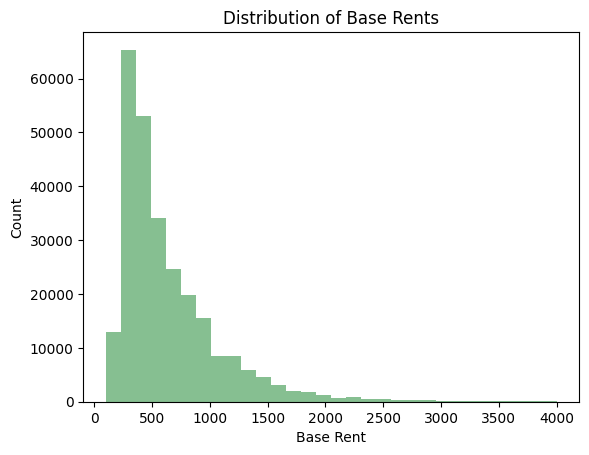

In [117]:
data['baseRent'].hist(bins=30, range=(100,4000), grid=False, color='#86bf91')
plt.title('Distribution of Base Rents')
plt.xlabel('Base Rent')
plt.ylabel('Count')

In [118]:
filtered_data = data[(data['yearConstructed'] >= 1990) & (data['yearConstructed'] <= 2019)]
mean_base_rent_by_year = filtered_data.groupby('yearConstructed')['baseRent'].mean()
#df = px.data.stocks()
fig = px.line(mean_base_rent_by_year)
fig.update_layout(
    title='MEAN BASE RENT ACCORDING TO YEAR CONSTRUCTED',
    yaxis_title='MEAN BASE RENT',
    xaxis_title='YEAR CONSTRUCTED',
    plot_bgcolor='lightblue'
)
fig.show()

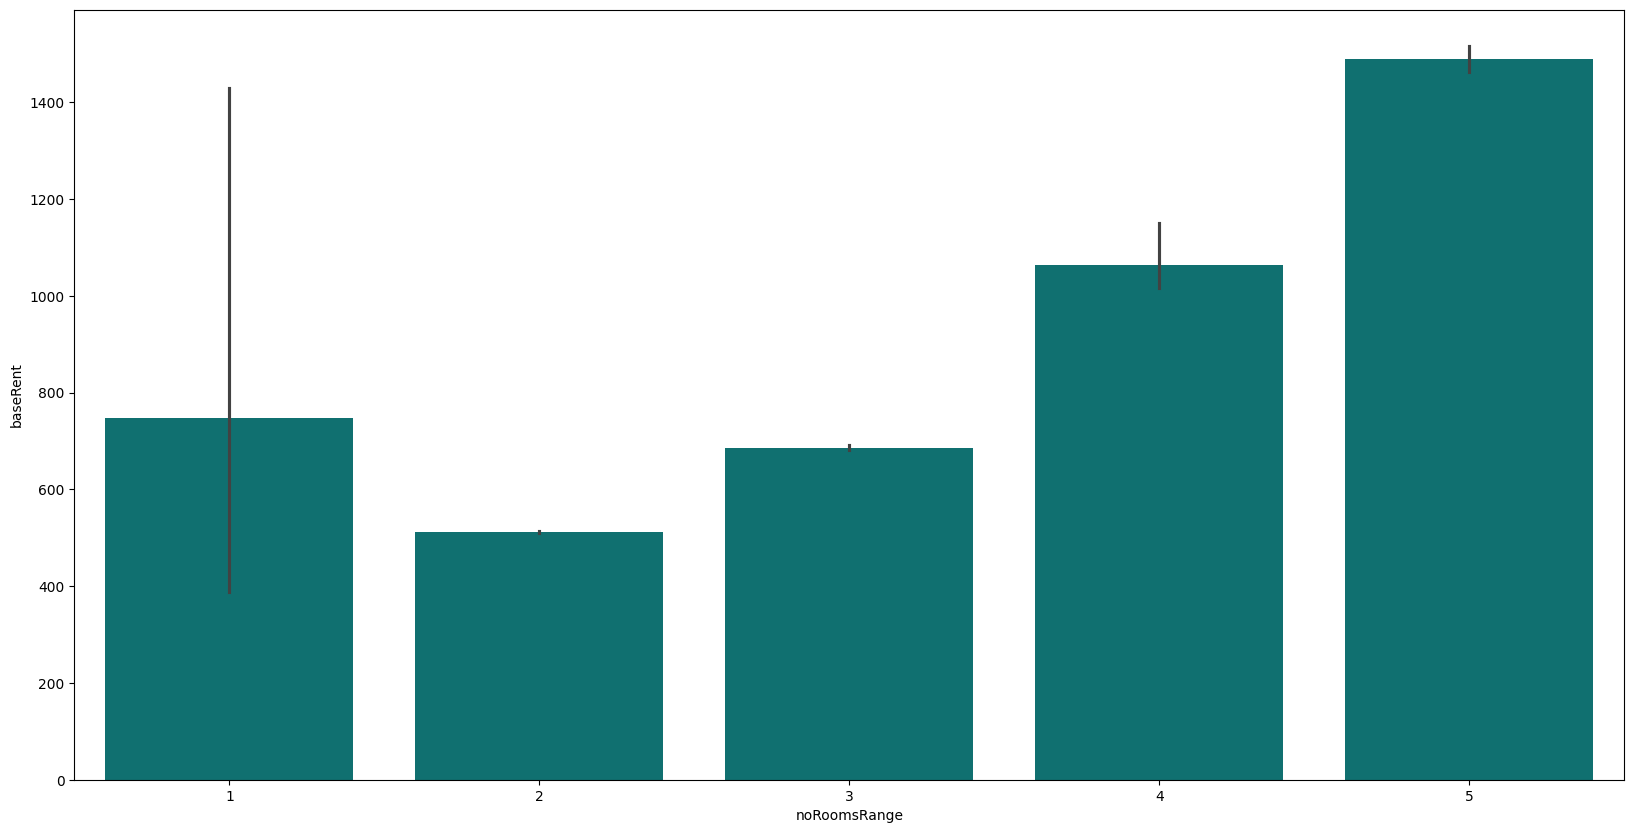

In [122]:
plt.figure(figsize=(20,10))
sns.barplot(x=data.noRoomsRange, y=data.baseRent, color='teal')  # Adjust color as needed
plt.show()